# Simple usage

This notebook demonstrates basic usage of the *openTSNE* library. This is sufficient for almost all use-cases.

In [1]:
from openTSNE import TSNE

from examples import utils

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Load data

In most of the notebooks, we will be using the Macosko 2015 mouse retina data set. This is a fairly well-known and well explored data set in the single-cell literature making it suitable as an example.

In [2]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


## Create train/test split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

In [5]:
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


## Run t-SNE

We'll first create an embedding on the training data.

In [6]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [7]:
%time embedding_train = tsne.fit(x_train)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 3.89 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.44 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.10 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.8046, 50 iterations in 1.7123 sec
Iteration  100, KL divergence 5.2268, 50 iterations in 1.8265 sec
Iteration  150, KL divergence 5.1357, 50 iterations in 2.0626 sec
Iteration  200, KL divergence 5.0977, 50 iterations in 2.0250 sec
Iteration  250, KL divergence 5.0772, 50 iterations in 1.9598 sec
   --> Time elapsed: 9.59 seconds
===> Running optimization with exaggeration=1.00, lr=2501.75 for 500

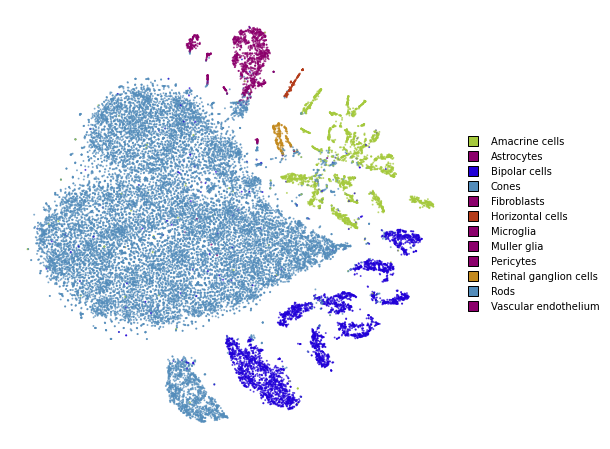

In [8]:
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

## Transform

openTSNE is currently the only library that allows embedding new points into an existing embedding.

In [9]:
%time embedding_test = embedding_train.transform(x_test)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.12 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 214688.6176, 50 iterations in 0.3767 sec
Iteration  100, KL divergence 213210.5159, 50 iterations in 0.3881 sec
Iteration  150, KL divergence 212270.1679, 50 iterations in 0.3898 sec
Iteration  200, KL divergence 211592.6686, 50 iterations in 0.3881 sec
Iteration  250, KL divergence 211074.3288, 50 iterations in 0.3814 sec
   --> Time elapsed: 1.92 seconds
CPU times: user 19.2 s, sys: 650 ms, total: 19.8 s
Wall time: 3.89 s


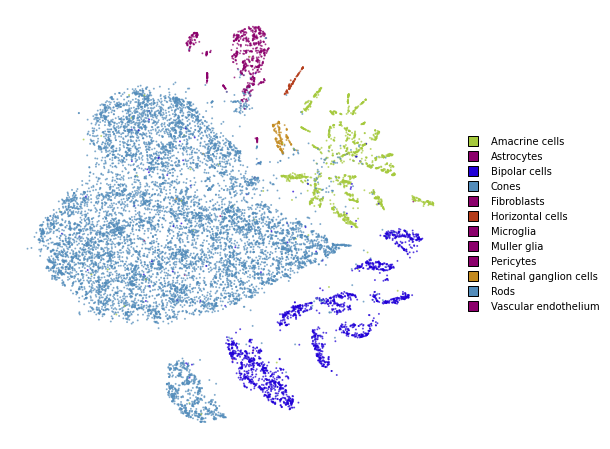

In [10]:
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)

## Together

We superimpose the transformed points onto the original embedding with larger opacity.

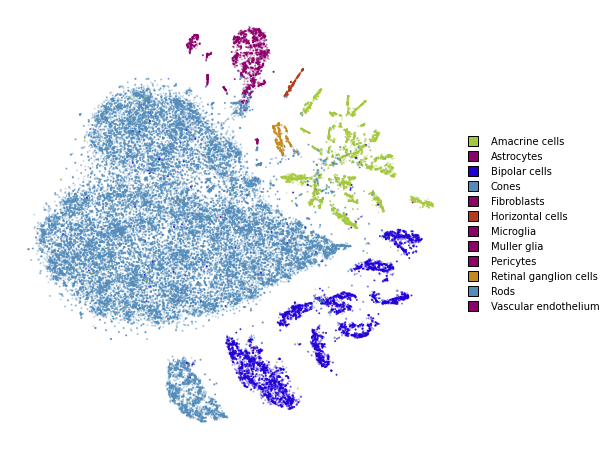

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)